# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

*<font color = blue>到目前為止，我們所做的所有分析都非常通用 - 查看計數、建立散點圖等。這些技術也可以應用於數值資料。</font>*

*<font color = blue>當談到文字資料時，我們將在接下來的幾本筆記本中介紹一些流行的技術，首先是情緒分析。 情緒分析中需要記住的幾個關鍵點。</font>*

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.

*<font color = blue>TextBlob 模組：語言研究人員根據其領域專業知識標記了單字的情感。 單字的情感可能會根據它在句子中的位置而有所不同。 TextBlob 模組讓我們可以利用這些標籤。</font>*

*<font color = blue>情緒標籤：語料庫中的每個單字都根據極性和主觀性進行標記（還有更多標籤，但我們現在將忽略它們）。 語料庫的情緒是這些情緒的平均值。</font>*

   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.
   
   *<font color = blue> 極性：一個字的積極或消極程度。 -1 非常負面。 +1 非常積極。</font>*
   
   *<font color = blue> 主觀性：一個字的主觀性或固執己見的程度。 0是事實。 +1 很大程度是一種意見。</font>*

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [12]:
from google.colab import drive
drive.mount('/content/drive')

# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/2024.01.05/nlp-in-python-tutorial-master/pickle/corpus.pkl')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney
louis,Intro Fade the music out. Let’s roll. Hold the...,Louis C.K.
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. ...",Mike Birbiglia
ricky,Hello. Hello! How you doing? Great. Thank you....,Ricky Gervais


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# 建立快速 lambda 函數來找出每個例程的極性和主觀性
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.072214,0.485292
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.062097,0.562309
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.017404,0.539164
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.001169,0.516065
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.046348,0.525094
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.041589,0.548964
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.084409,0.485703
louis,Intro Fade the music out. Let’s roll. Hold the...,Louis C.K.,0.059437,0.518188
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. ...",Mike Birbiglia,0.094986,0.520312
ricky,Hello. Hello! How you doing? Great. Thank you....,Ricky Gervais,0.068287,0.499025


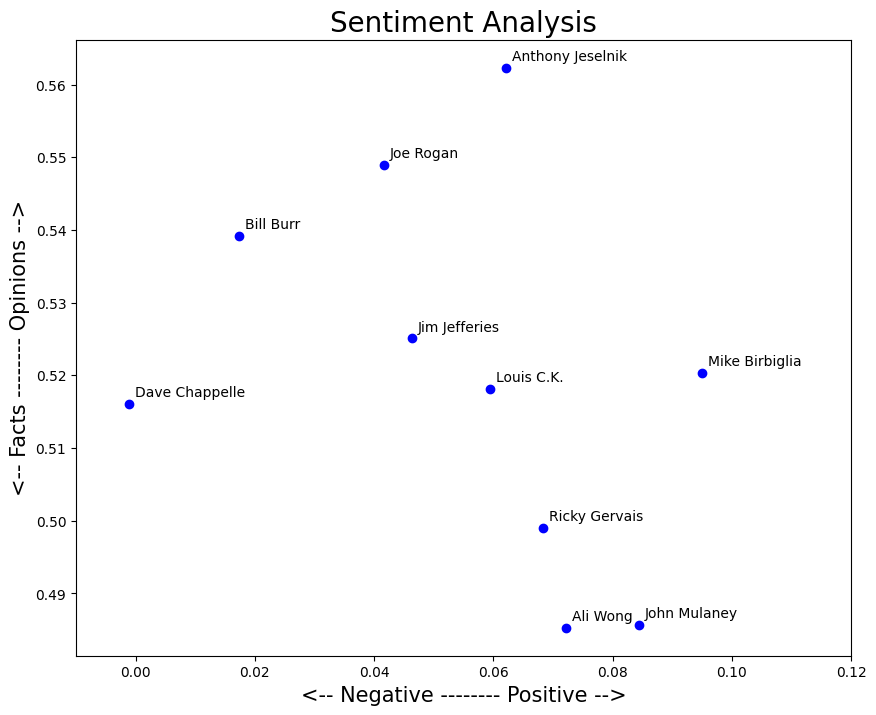

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [4]:
# Split each routine into 10 parts
# 將每個例程分成 10 個部分
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [5]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.072214,0.485292
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.062097,0.562309
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.017404,0.539164
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.001169,0.516065
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.046348,0.525094
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.041589,0.548964
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.084409,0.485703
louis,Intro Fade the music out. Let’s roll. Hold the...,Louis C.K.,0.059437,0.518188
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. ...",Mike Birbiglia,0.094986,0.520312
ricky,Hello. Hello! How you doing? Great. Thank you....,Ricky Gervais,0.068287,0.499025


In [6]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through. And then, when they go to sleep, they just go to

In [7]:
# The list has 10 elements, one for each transcript
len(list_pieces)

10

In [8]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [9]:
# Calculate the polarity for each piece of text
# 計算每段文字的極性

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.10982341269841271,
  0.07110552202101499,
  0.06663909503195219,
  0.1006832611832612,
  -0.042106537530266344,
  0.14623107111520778,
  0.043776142688480346,
  0.11059920634920634,
  0.021229984683932054,
  0.10156361051883439],
 [0.14813544856227787,
  -0.09949866310160428,
  -0.012800819252432169,
  0.03688446969696969,
  0.12803576894485985,
  0.13571056547619048,
  0.09253105590062112,
  -0.006643738977072304,
  0.026168716644907115,
  0.17564893117218697],
 [-0.032260689190037016,
  0.008594086225665173,
  0.041578921657046665,
  0.014611938286180702,
  -0.05097013552895906,
  0.10209224165856819,
  0.02489288312911193,
  -0.03384265164399092,
  -0.017585338795016225,
  0.1203067052366118],
 [-0.05093449586407334,
  -0.075557111917789,
  0.05784279391020966,
  0.04673358213950997,
  -0.004137488328664796,
  0.08436975722690004,
  -0.13032021268873403,
  -0.09308660933660934,
  -0.04851963512677798,
  0.22741801437556156],
 [0.0900033676665111,
  0.12663816319339574,
  0.09945

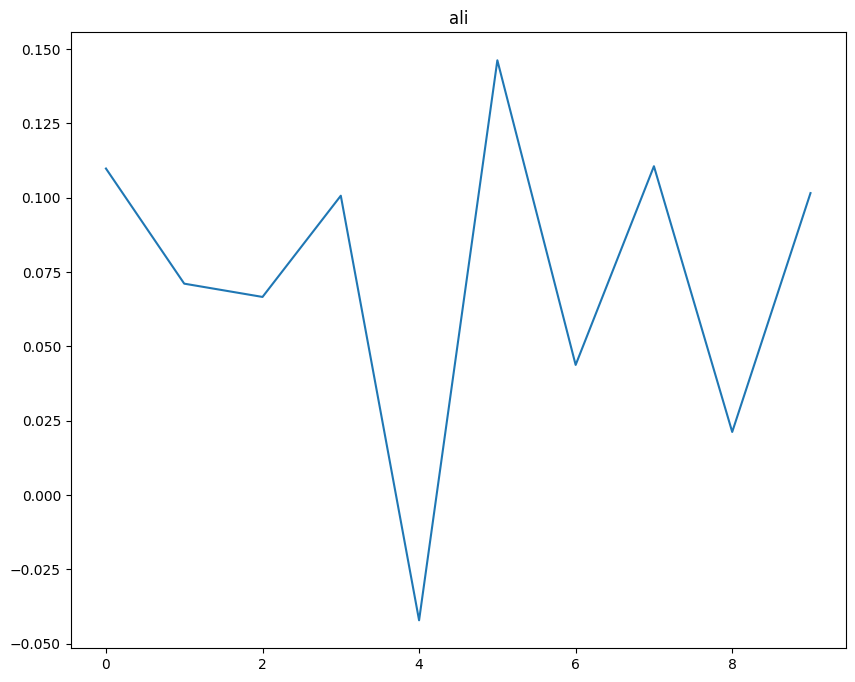

In [10]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

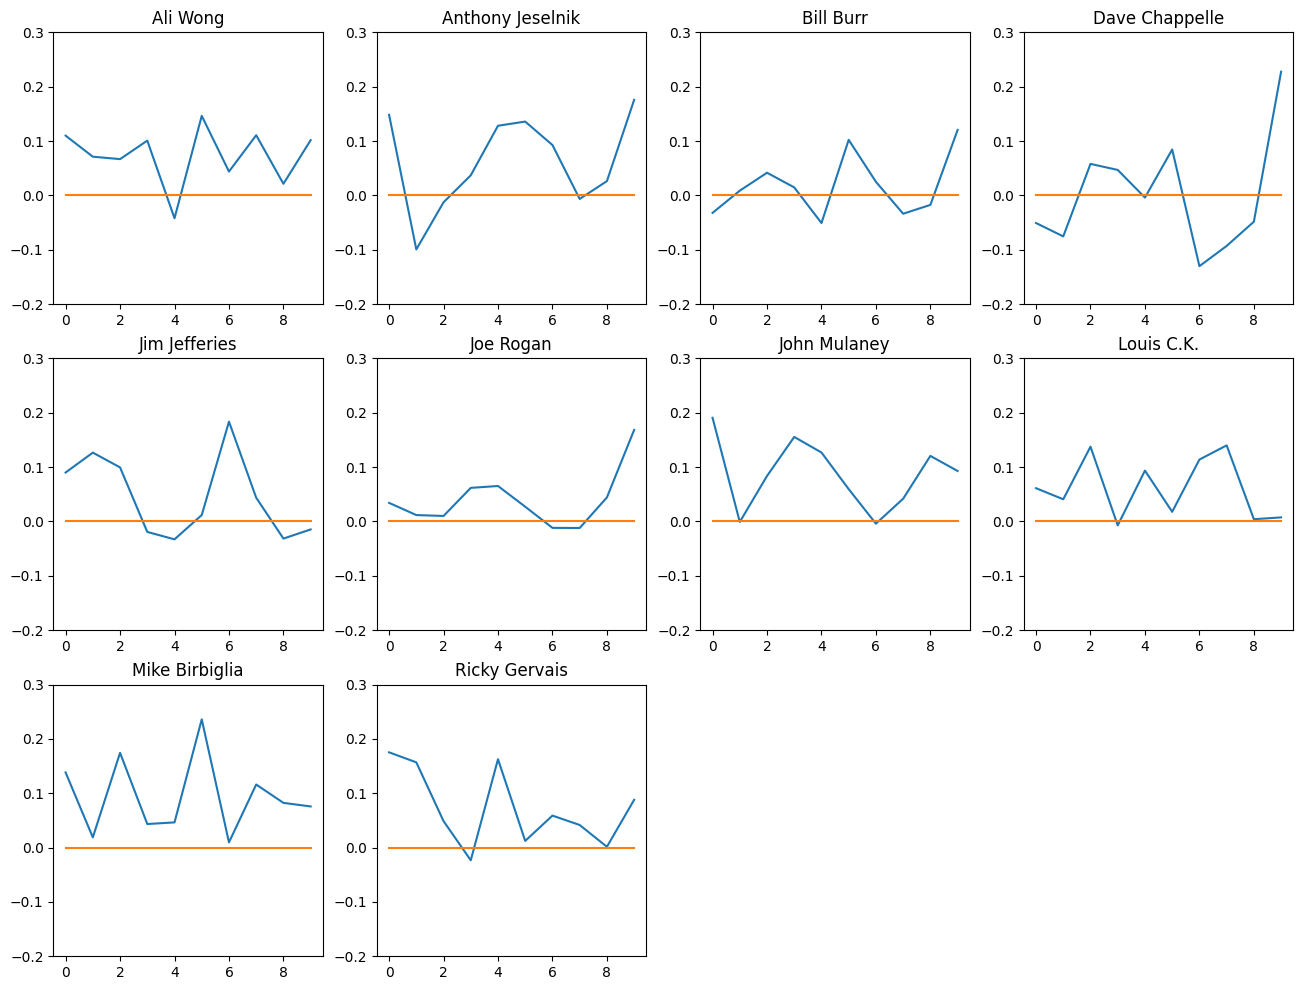

In [11]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)

plt.show()

Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.

On the other hand, you have some pretty different patterns here like Bo Burnham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.

*<font color = blue>Ali Wong在日常工作中整體上保持積極樂觀的態度。 類似的喜劇演員還有 Louis C.K. 和邁克·比爾比利亞。</font>*

*<font color = blue>另一方面，這裡有一些非常不同的模式，例如而戴夫·查佩爾（Dave Chappelle）在日常生活中也有一些相當低落的時刻。</font>*

## Additional Exercises

1. Modify the number of sections the comedy routine is split into and see how the charts over time change.